## <b> MISSING DATA ANALYSIS
    
Warning: If Missing Values occur randomly we can think to remove it. However, if it occurs due to structural reasons, it will damage the reliablity of model. \
Example: Customers who don't have credit card will be shown null in credit card expense. \
NA is not always missing value. \
To remove missing value will cause to remove the other records in the same row
    
### Missing Value Types
* Completely randomly missing value
* Randomly missing value : depends on other variables
* not randomly missing value : refers to structural problems
    
## Three Rondomness Tests for Missing Value 

We decide if to remove by the tests below.

* Visual technics (Pratikte uygulanan bu)
* Independent 2 Sample t Testing
* Correlation testing
* Little's MCAR Testing (Pratikte uygulanan digeri bu)


Warning: If data is missing in the ratio of 50% -60%, we can prefer to remove the rest.

    
### Missing Value Correction Methods:
    
- Remove nulls 
- Fill nulls
- Predict nulls

isnull() \
notnull() \
dropna() \
fillnull() \
fillna() \
where()

In [1]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN, 7,1,np.NaN, 9,15])
V2 = np.array([7,np.NaN, 5,8,12, np.NaN, np.NaN, 2,3])
V3 = np.array([np.NaN,12,5,6,14,7, np.NaN,2,31])

df = pd.DataFrame({"v1":V1, "v2":V2, "v3":V3})
df

,v1,v2,v3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [2]:
df.isnull().sum()

v1    2
v2    3
v3    2
dtype: int64

In [3]:
df.notnull().sum()

v1    7
v2    6
v3    7
dtype: int64

In [4]:
df.isnull().sum().sum()

7

In [5]:
df[df["v1"].notnull() & df["v2"].notnull() & df["v3"].notnull()] # same as above

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### <b>Removing Missing Data quickly

  df.dropna()

In [6]:
df.dropna() # inplace =True in paranthesis will change data permanently

,v1,v2,v3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### <b>Filling Missing Data quickly
    
  df.fillna()

In [7]:
# Let's fill nulls with mean value

df["v1"].mean()

6.0

In [8]:
df["v1"].fillna(df["v1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: v1, dtype: float64

- Let's fill nulls with fix value

In [9]:
df["v2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: v2, dtype: float64

- Let's fill nulls using apply() function

In [10]:

df.apply(lambda x: x.fillna(x.mean()), axis=1)

,v1,v2,v3
0,1.0,7.0,4.0
1,3.0,7.5,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,4.0,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


- Let's fill nulls with overall df mean

In [11]:
df.fillna(df.mean()[:])

,v1,v2,v3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [12]:
df.fillna(df.mean()[["v1","v3"]])  # same as above 

,v1,v2,v3
0,1.0,7.0,11.0
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,6.0,NaN,11.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### <b>np.where( condition, IF ensure condition use this, ELSE use this )<b/> 
- condition: what should be / other: if not, apply this one

In [13]:
df.where(pd.notna(df), df.mean(),axis="columns") # same as above

,v1,v2,v3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### <b>Missing Value for Categorical Data

In [14]:
v1 = np.array([1,3,6, np.nan, 7,1,np.nan,9,15])
v2 = np.array([7,np.nan,5,8,12,np.nan, np.nan,2,31])
v3 = np.array([np.nan,12,5,6,14,7, np.nan,2,31])
v4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame({"maas":v1,"v2" : v2,"v3" : v3,"dept": v4})
df

,maas,v2,v3,dept
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,31.0,31.0,IT


In [15]:
df.groupby("dept").mean()

,maas,v2,v3
dept,,,
IK,4.666667,8.333333,8.0
IT,7.000000,13.333333,15.0


In [16]:
# Let's fill each columns with their mean and by deparments

df.fillna(df.groupby("dept").transform("mean"))

,maas,v2,v3,dept
0,1.000000,7.000000,15.0,IT
1,3.000000,13.333333,12.0,IT
2,6.000000,5.000000,5.0,IK
3,4.666667,8.000000,6.0,IK
4,7.000000,12.000000,14.0,IK
5,1.000000,8.333333,7.0,IK
6,4.666667,8.333333,8.0,IK
7,9.000000,2.000000,2.0,IT
8,15.000000,31.000000,31.0,IT


- <b>what if nulls in categorical variable 

.mode()

In [17]:
v1 = np.array([1,3,6, np.nan, 7,1,np.nan,9,15])
v4 = np.array(["IT", np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame({"maas":v1, "dept": v4} )
df

,maas,dept
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [18]:
df["dept"].mode()[0]

'IK'

In [19]:
df["dept"].fillna(df["dept"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: dept, dtype: object

- <b>Filling with the following value

In [20]:
df["dept"].fillna(method="bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: dept, dtype: object

- <b>Filling with the previous value

In [21]:
df["dept"].fillna(method="ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: dept, dtype: object

### <b>Visualization of Missing Values
    
    msno.bar()
    msno.matrix()
    msno.heatmap()

In [22]:
!pip install missingno

In [23]:
import missingno as msno

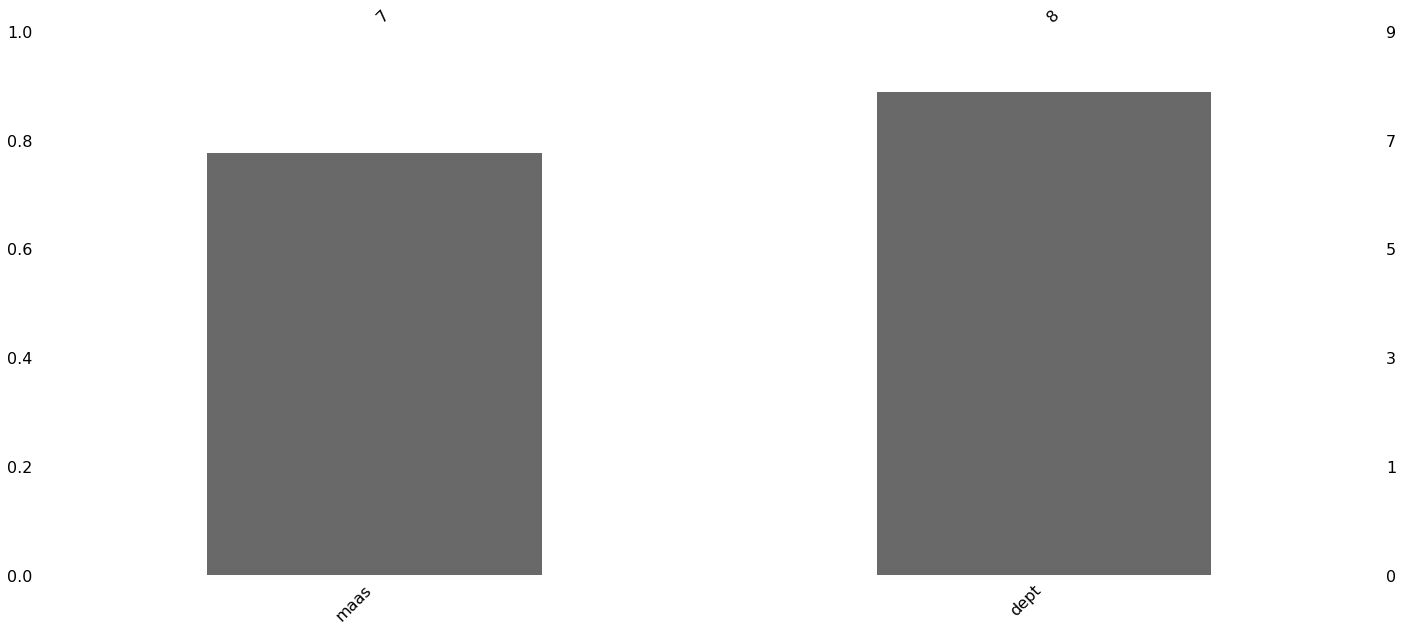

In [24]:
msno.bar(df);

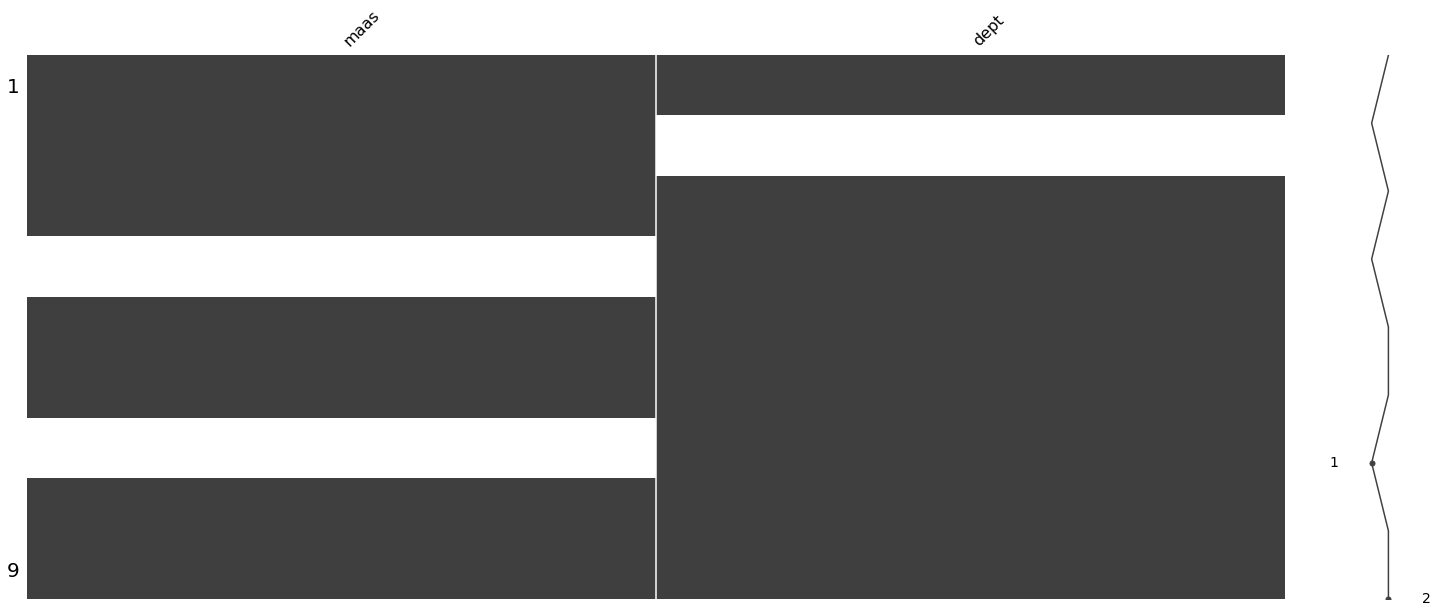

In [25]:
msno.matrix(df)

In [26]:
import seaborn as sns

df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [27]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

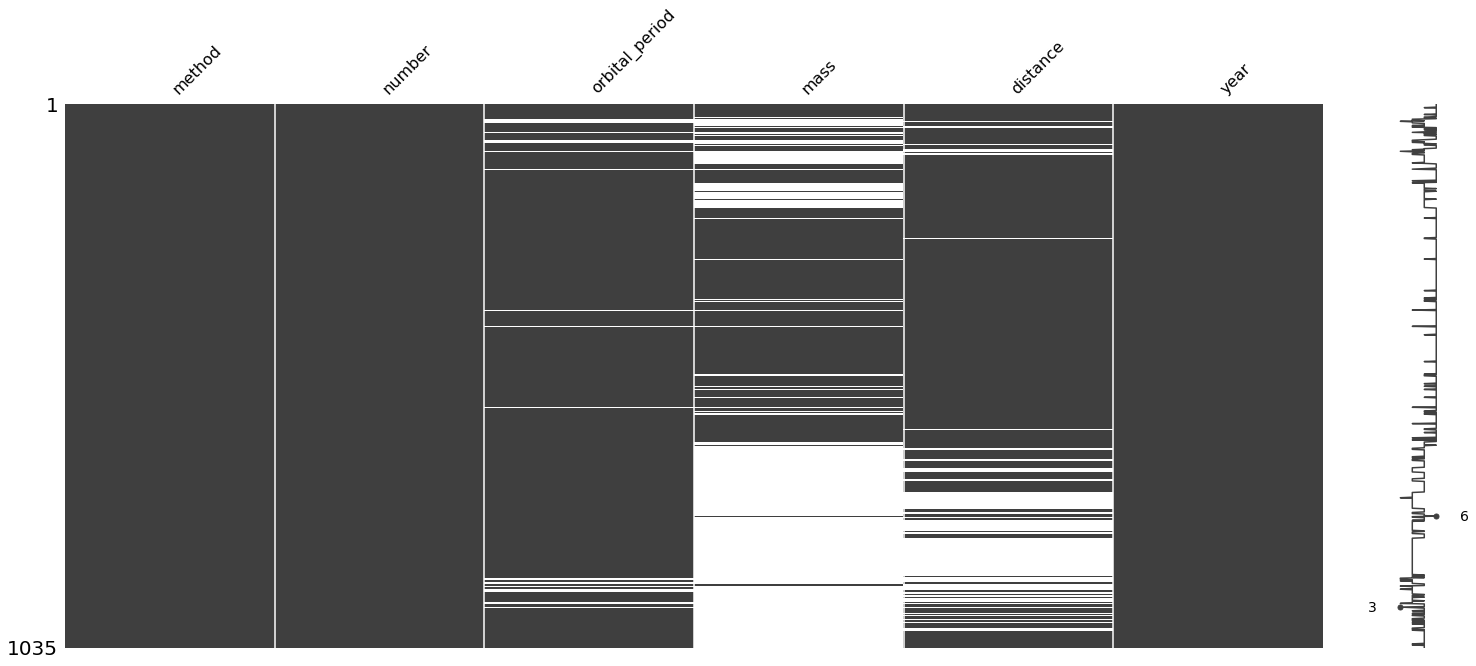

In [28]:
msno.matrix(df)

 nullity correlation : msno.heatmap()

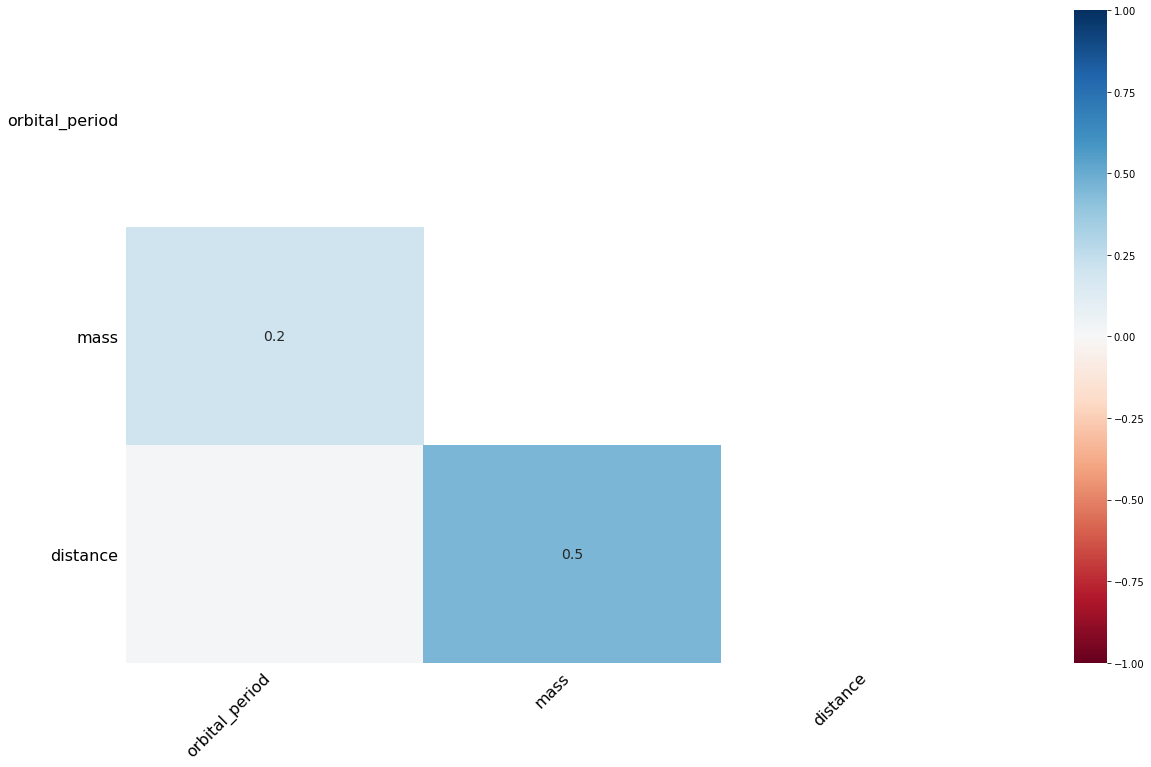

In [29]:
# msno.heatmap() is used to observe the correlation of missing data

msno.heatmap(df)

## <b>Filling Nulls With Machine Learning
    
    KNN
    Random Forest
    EM

In [48]:
import seaborn as sns
import numpy as np
import pandas as pd

df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- ### Let's use ***KNN*** for Numeric Variables

In [6]:
# !pip install ycimpute

In [49]:
from ycimpute.imputer import knnimput

In [10]:
df_num=df.select_dtypes(include=["float64", "int64"])
df_num.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [12]:
var_names = list(df_num)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [15]:
ndf_num =np.array(df_num)
ndf_num

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [51]:
# Now we are filling nulls automatically using KNN
ndf_num_filled = knnimput.KNN(k=4).complete(ndf_num)
ndf_num_filled

Imputing row 1/891 with 0 missing, elapsed time: 0.205
Imputing row 101/891 with 0 missing, elapsed time: 0.207
Imputing row 201/891 with 0 missing, elapsed time: 0.208
Imputing row 301/891 with 1 missing, elapsed time: 0.209
Imputing row 401/891 with 0 missing, elapsed time: 0.210
Imputing row 501/891 with 0 missing, elapsed time: 0.212
Imputing row 601/891 with 0 missing, elapsed time: 0.213
Imputing row 701/891 with 0 missing, elapsed time: 0.214
Imputing row 801/891 with 0 missing, elapsed time: 0.215


array([[ 0.        ,  3.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 1.        ,  3.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 0.        ,  3.        , 26.02641356,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 0.        ,  3.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

In [24]:
# Let's convert DataFrame

df_filled = pd.DataFrame(ndf_num_filled, columns=var_names)
df_filled.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [25]:
# Let's check it if it is filled.

df_filled.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

- ### Let's use ***EM*** for Numeric Variables

In [38]:
from ycimpute import EM

In [46]:
df=sns.load_dataset("titanic")
df_num1=df.select_dtypes(include=["float64", "int64"])
df_num1.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [45]:
df_num1_filled = pd.DataFrame(EM().complete(np.array(df_num1)), columns=list(df_num1))
df_num1_filled.isnull()

,survived,pclass,age,sibsp,parch,fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,False,False
889,False,False,False,False,False,False


- ### Let's use ***Random Forest*** for Numeric Variables

In [52]:
from ycimpute.imputer import iterforest

In [54]:
df=sns.load_dataset("titanic")
df_num2=df.select_dtypes(include=["float64", "int64"])
df_num2.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64